# Pseudocode from mam

In [ ]:
# Step 1: Import and clean column names
import pandas as pd
df = pd.read_csv("RealEstate_Prices.csv")
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Step 2: Handle missing values
missing_values = df.isnull().sum()
if missing_values > 0:
    # Imputation or removal strategy

# Step 3: Perform data merging (if necessary)
if additional_data:
    df_merged = pd.merge(df, additional_data, on="property_id")

# Step 4: Filter and subset the data
filtered_df = df.loc[(df["sale_date"] >= "2020-01-01") & (df["property_type"] == "residential")]

# Step 5: Handle categorical variables
categorical_cols = ["property_type", "location"]
for col in categorical_cols:
    df[col] = pd.get_dummies(df[col], drop_first=True)

# Step 6: Aggregate the data
aggregated_df = df.groupby("neighborhood").agg({"sale_price": "mean"})

# Step 7: Identify and handle outliers
outliers = df[(df["sale_price"] > 3 * df["sale_price"].std()) | (df["sale_price"] < -3 * df["sale_price"].std())]
# if outliers:
    # Handle outliers

# 1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, special characters, or renaming them for clarity.

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('RealEstate_Prices.csv')
additional = pd.read_csv('additional_info.csv')
df.columns,additional.columns

(Index(['property id', 'property type', 'neighborhood', 'bedrooms', 'bathrooms',
        'area sq ft', 'year built', 'sale price', 'sale date'],
       dtype='object'),
 Index(['property id', 'distance to amenities mi', 'crime rate',
        'nearby schools', 'demographics population', 'nearby shopping centers',
        'property taxes', 'house condition'],
       dtype='object'))

In [9]:
df.columns = [col.replace(" ","_") for col in df.columns]
additional.columns = [col.replace(" ","_") for col in additional.columns]

In [10]:
df.columns,additional.columns

(Index(['property_id', 'property_type', 'neighborhood', 'bedrooms', 'bathrooms',
        'area_sq_ft', 'year_built', 'sale_price', 'sale_date'],
       dtype='object'),
 Index(['property_id', 'distance_to_amenities_mi', 'crime_rate',
        'nearby_schools', 'demographics_population', 'nearby_shopping_centers',
        'property_taxes', 'house_condition'],
       dtype='object'))

# 3. Perform data merging if additional datasets with relevant information are available (e.g., neighborhood demographics or nearby amenities)

In [11]:
merged_df = pd.merge(df,additional,on='property_id',how='inner')

In [12]:
merged_df.head()

,property_id,property_type,neighborhood,bedrooms,bathrooms,area_sq_ft,year_built,sale_price,sale_date,distance_to_amenities_mi,crime_rate,nearby_schools,demographics_population,nearby_shopping_centers,property_taxes,house_condition
0,1001,Apartment,Downtown,3.0,2,1154.0,2001,341218.0,29-09-2020,0.5,Low,3,50000.0,5,10000,Good
1,1002,House,Suburban,4.0,3,2553.0,2014,490564.0,03-04-2021,1.2,Medium,4,60000.0,2,4000,Excellent
2,1003,Condo,Urban,2.0,1,821.0,2008,NaN,15-04-2020,0.3,High,1,40000.0,8,2000,Fair
3,1004,House,Suburban,5.0,4,3018.0,2004,560852.0,25-08-2020,2.5,Low,5,70000.0,3,5000,Excellent
4,1005,Apartment,Downtown,2.0,1,976.0,2013,297985.0,21-05-2022,0.8,Low,3,52000.0,4,3500,Good


# 2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g.,imputation or removal).

In [14]:
# checking for missing values
merged_df.isna().sum()

,0
property_id,0
property_type,0
neighborhood,0
bedrooms,5
bathrooms,0
area_sq_ft,2
year_built,0
sale_price,5
sale_date,0
distance_to_amenities_mi,0


## Imputation

In [ ]:
categorical_cols = ['bedrooms']
numerical_cols = ['area_sq_ft','sale_price','demographics_population']

for col in categorical_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])

for col in numerical_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mean())

In [ ]:
merged_df.isna().sum()

property_id                 0
property_type               0
neighborhood                0
bedrooms                    0
bathrooms                   0
area_sq_ft                  0
year_built                  0
sale_price                  0
sale_date                   0
distance_to_amenities_mi    0
crime_rate                  0
nearby_schools              0
demographics_population     0
nearby_shopping_centers     0
property_taxes              0
house_condition             3
dtype: int64

## Removal

In [ ]:
merged_df = merged_df.dropna()

In [ ]:
merged_df.isna().sum()

property_id                 0
property_type               0
neighborhood                0
bedrooms                    0
bathrooms                   0
area_sq_ft                  0
year_built                  0
sale_price                  0
sale_date                   0
distance_to_amenities_mi    0
crime_rate                  0
nearby_schools              0
demographics_population     0
nearby_shopping_centers     0
property_taxes              0
house_condition             0
dtype: int64

# 4. Filter and subset the data based on specific criteria, such as a particular time period, property type, or location.

In [15]:
merged_df[(merged_df["sale_date"] >= "2020-01-01") & (merged_df["property_type"] == "Apartment")]


,property_id,property_type,neighborhood,bedrooms,bathrooms,area_sq_ft,year_built,sale_price,sale_date,distance_to_amenities_mi,crime_rate,nearby_schools,demographics_population,nearby_shopping_centers,property_taxes,house_condition
0,1001,Apartment,Downtown,3.0,2,1154.0,2001,341218.0,29-09-2020,0.5,Low,3,50000.0,5,10000,Good
4,1005,Apartment,Downtown,2.0,1,976.0,2013,297985.0,21-05-2022,0.8,Low,3,52000.0,4,3500,Good
17,1018,Apartment,Suburban,NaN,1,NaN,2022,180891.0,26-06-2021,1.0,Medium,2,48000.0,6,1800,Fair
34,1035,Apartment,Downtown,2.0,1,924.0,2018,349800.0,30-12-2022,0.8,Low,3,52000.0,4,3500,Good
47,1048,Apartment,Suburban,NaN,1,714.0,2016,180722.0,30-04-2021,1.0,Medium,2,48000.0,6,1800,Fair


# 5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or label encoding) for further analysis.

In [16]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['property_type',
'neighborhood',
'crime_rate',
'house_condition']

enc = LabelEncoder()

for col in categorical_cols:
    merged_df[col] = enc.fit_transform(merged_df[col])

In [17]:
merged_df.head()

,property_id,property_type,neighborhood,bedrooms,bathrooms,area_sq_ft,year_built,sale_price,sale_date,distance_to_amenities_mi,crime_rate,nearby_schools,demographics_population,nearby_shopping_centers,property_taxes,house_condition
0,1001,0,0,3.0,2,1154.0,2001,341218.0,29-09-2020,0.5,1,3,50000.0,5,10000,2
1,1002,2,2,4.0,3,2553.0,2014,490564.0,03-04-2021,1.2,2,4,60000.0,2,4000,0
2,1003,1,3,2.0,1,821.0,2008,NaN,15-04-2020,0.3,0,1,40000.0,8,2000,1
3,1004,2,2,5.0,4,3018.0,2004,560852.0,25-08-2020,2.5,1,5,70000.0,3,5000,0
4,1005,0,0,2.0,1,976.0,2013,297985.0,21-05-2022,0.8,1,3,52000.0,4,3500,2


# 6. Aggregate the data to calculate summary statistics or derived metrics such as average sale prices by neighborhood or property type.

In [18]:
aggregated_df = merged_df.groupby("neighborhood").agg({"sale_price": "mean"})
aggregated_df

,sale_price
neighborhood,
0,317621.20
1,568279.80
2,418178.05
3,1204583.60


# 7. Identify and handle outliers or extreme values in the data that may affect the analysis or modeling process.

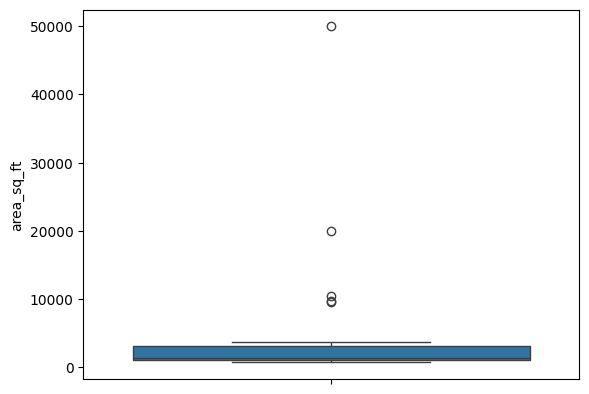

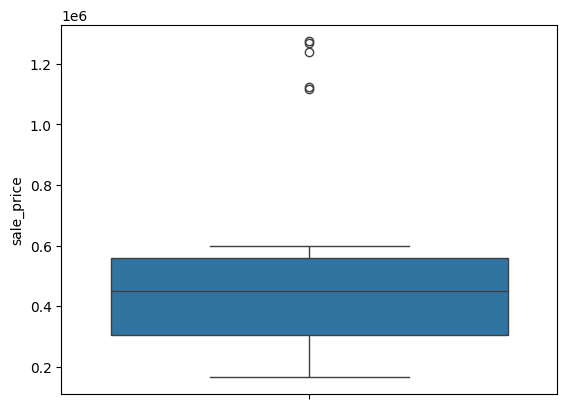

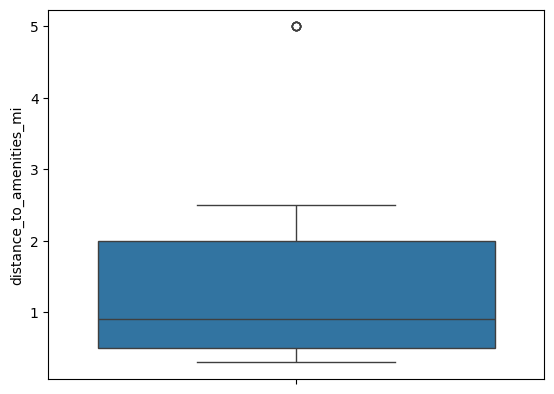

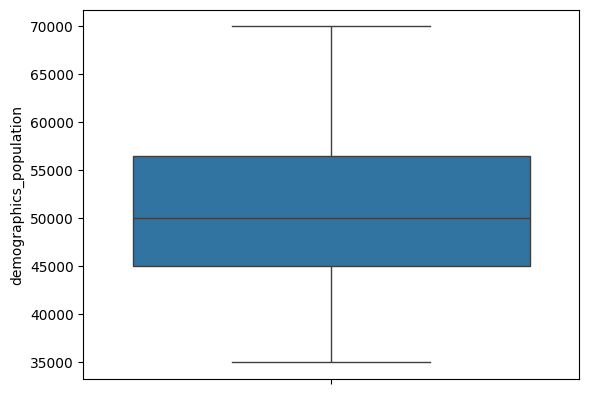

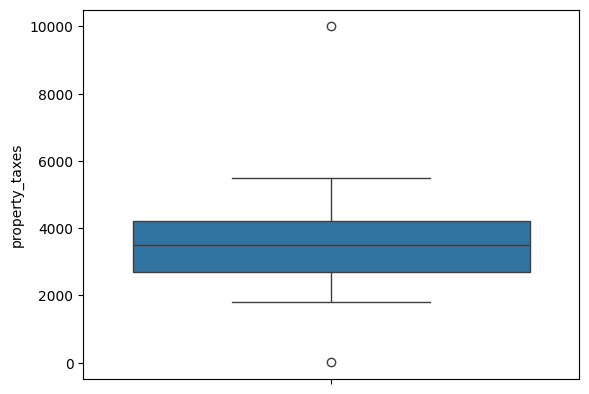

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = [
'area_sq_ft',
'sale_price',
'distance_to_amenities_mi',
'demographics_population',
'property_taxes'
]

for col in cols:
    sns.boxplot(merged_df[col])
    plt.show()

In [ ]:
merged_df[(merged_df["sale_price"] > 3 * merged_df["sale_price"].std()) | (merged_df["sale_price"] < -3 * merged_df["sale_price"].std())]

,property_id,property_type,neighborhood,bedrooms,bathrooms,area_sq_ft,year_built,sale_price,sale_date,distance_to_amenities_mi,crime_rate,nearby_schools,demographics_population,nearby_shopping_centers,property_taxes,house_condition
5,1006,1,3,3.0,2,1399.0,2020,1117439.0,09-05-2020,0.6,0,2,45000.0,7,3200,2
15,1016,1,3,3.0,2,1365.0,2021,1124017.0,29-08-2020,0.6,0,2,45000.0,7,3200,2
25,1026,1,3,3.0,2,1452.0,2013,1268442.0,08-03-2021,0.6,0,2,45000.0,7,3200,2
35,1036,1,3,3.0,2,1390.0,2019,1274015.0,02-08-2020,0.6,0,2,45000.0,7,3200,2
45,1046,1,3,3.0,2,20003.0,2020,1239005.0,07-11-2021,0.6,0,2,45000.0,7,3200,2
